In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)#5

In [2]:
df= pd.read_csv('flights.csv.zip',na_values=['-'])#na_values=['-']

In [3]:
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(5819079, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [6]:
df.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [7]:
df = df[['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']]

In [8]:
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,ANC,SEA,5,2354.0,-11.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,LAX,PBI,10,2.0,-8.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,SFO,CLT,20,18.0,-2.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,LAX,MIA,20,15.0,-5.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,SEA,ANC,25,24.0,-1.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.isnull().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

In [10]:
df[df['ARRIVAL_DELAY'].isnull()].shape

(105071, 21)

In [11]:
na_values = df[df['AIR_SYSTEM_DELAY'].isnull() & df['SECURITY_DELAY'].isnull() 
            & df['AIRLINE_DELAY'].isnull() & df['LATE_AIRCRAFT_DELAY'].isnull() & df['WEATHER_DELAY'].isnull()]
na_values.shape

(4755640, 21)

array([[<AxesSubplot:title={'center':'YEAR'}>,
        <AxesSubplot:title={'center':'MONTH'}>,
        <AxesSubplot:title={'center':'DAY'}>,
        <AxesSubplot:title={'center':'DAY_OF_WEEK'}>],
       [<AxesSubplot:title={'center':'SCHEDULED_DEPARTURE'}>,
        <AxesSubplot:title={'center':'DEPARTURE_TIME'}>,
        <AxesSubplot:title={'center':'DEPARTURE_DELAY'}>,
        <AxesSubplot:title={'center':'SCHEDULED_ARRIVAL'}>],
       [<AxesSubplot:title={'center':'ARRIVAL_TIME'}>,
        <AxesSubplot:title={'center':'ARRIVAL_DELAY'}>,
        <AxesSubplot:title={'center':'DIVERTED'}>,
        <AxesSubplot:title={'center':'CANCELLED'}>],
       [<AxesSubplot:title={'center':'AIR_SYSTEM_DELAY'}>,
        <AxesSubplot:title={'center':'SECURITY_DELAY'}>,
        <AxesSubplot:title={'center':'AIRLINE_DELAY'}>,
        <AxesSubplot:title={'center':'LATE_AIRCRAFT_DELAY'}>],
       [<AxesSubplot:title={'center':'WEATHER_DELAY'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dt

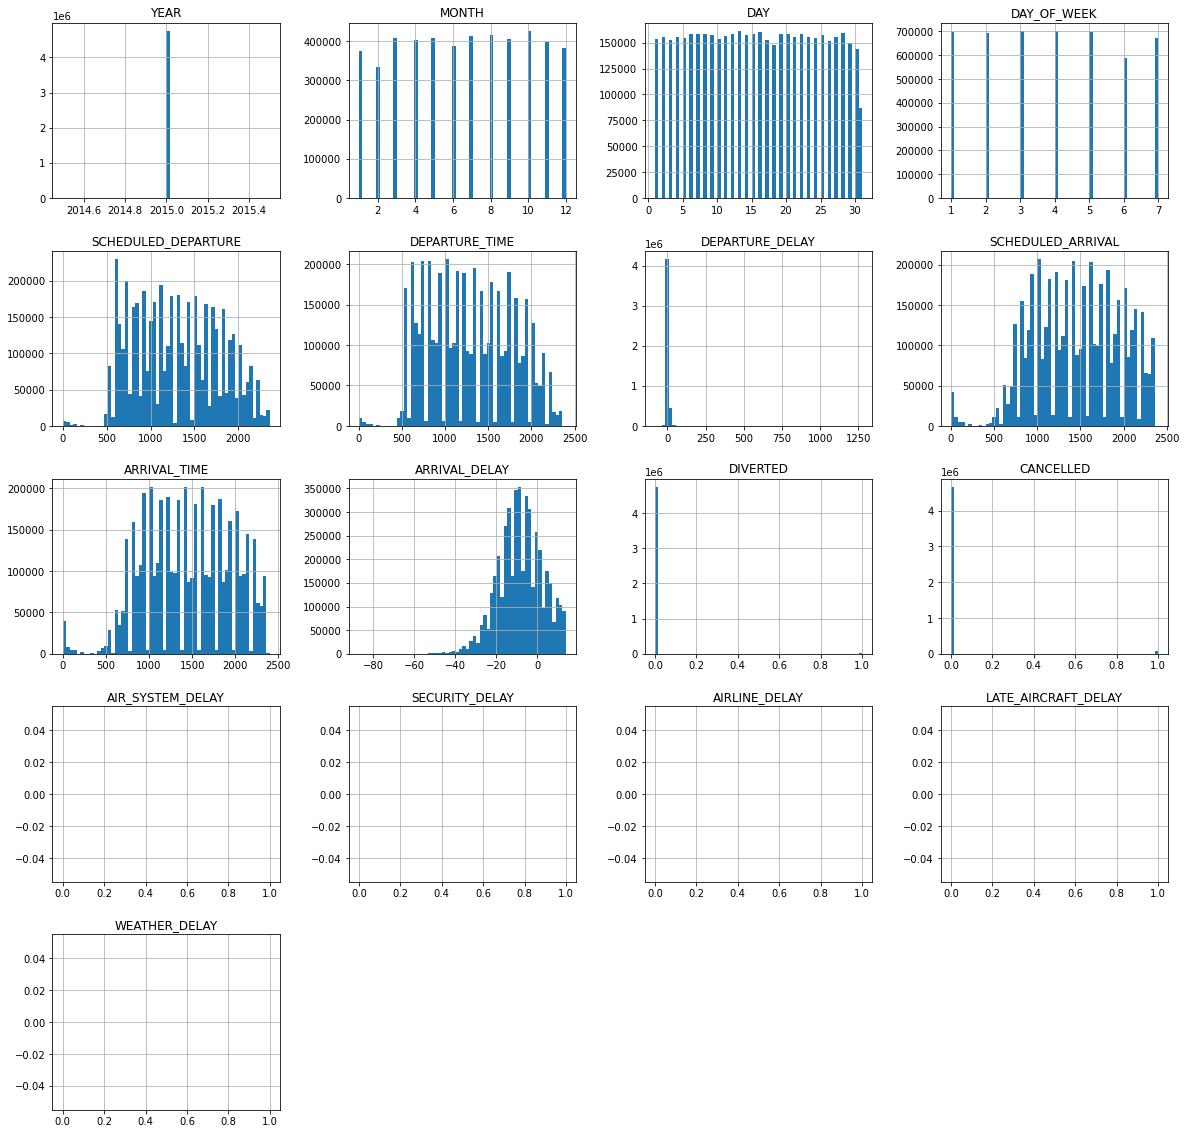

In [12]:
na_values.hist(bins=60, figsize=(20,20))

In [13]:
na_values[na_values['ARRIVAL_DELAY']<15]

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,ANC,SEA,5,2354.0,-11.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,LAX,PBI,10,2.0,-8.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,SFO,CLT,20,18.0,-2.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,LAX,MIA,20,15.0,-5.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,SEA,ANC,25,24.0,-1.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,LAX,BOS,2359,2355.0,-4.0,819,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,JFK,PSE,2359,2355.0,-4.0,446,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,JFK,SJU,2359,2350.0,-9.0,440,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,MCO,SJU,2359,2353.0,-6.0,340,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
na_values[na_values['ARRIVAL_DELAY']>13]

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
94,2015,1,1,4,UA,IAD,IAH,535,541.0,6.0,802,816.0,14.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
109,2015,1,1,4,EV,ATL,IAD,540,556.0,16.0,725,739.0,14.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
181,2015,1,1,4,UA,RNO,DEN,600,557.0,-3.0,910,924.0,14.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
204,2015,1,1,4,AA,MIA,PHL,600,604.0,4.0,844,858.0,14.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
490,2015,1,1,4,F9,SLC,DEN,615,617.0,2.0,747,801.0,14.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5817972,2015,12,31,4,DL,DTW,LGA,1940,2009.0,29.0,2126,2140.0,14.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5818194,2015,12,31,4,NK,FLL,DTW,2005,2029.0,24.0,2305,2319.0,14.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5818308,2015,12,31,4,B6,LGB,OAK,2015,2033.0,18.0,2132,2146.0,14.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5818644,2015,12,31,4,B6,PDX,JFK,2120,2114.0,-6.0,518,532.0,14.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
arrival_na= df[df['ARRIVAL_DELAY'].isnull()]

In [16]:
arrival_na

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
32,2015,1,1,4,AS,ANC,SEA,135,NaN,NaN,600,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN
42,2015,1,1,4,AA,PHX,DFW,200,NaN,NaN,500,NaN,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN
68,2015,1,1,4,OO,MAF,IAH,510,NaN,NaN,637,NaN,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN
82,2015,1,1,4,MQ,SGF,DFW,525,NaN,NaN,700,NaN,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN
90,2015,1,1,4,OO,RDD,SFO,530,NaN,NaN,700,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5818157,2015,12,31,4,UA,SFO,LAX,2000,NaN,NaN,2136,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN
5818160,2015,12,31,4,WN,MDW,ABQ,2000,2013.0,13.0,2215,2325.0,NaN,1,0,NaN,NaN,NaN,NaN,NaN,NaN
5818318,2015,12,31,4,AA,MIA,SAN,2019,NaN,NaN,2256,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN
5818777,2015,12,31,4,NK,FLL,IAG,2155,NaN,NaN,50,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN


In [17]:
arrival_na[arrival_na['CANCELLED']==1]

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
32,2015,1,1,4,AS,ANC,SEA,135,NaN,NaN,600,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN
42,2015,1,1,4,AA,PHX,DFW,200,NaN,NaN,500,NaN,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN
68,2015,1,1,4,OO,MAF,IAH,510,NaN,NaN,637,NaN,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN
82,2015,1,1,4,MQ,SGF,DFW,525,NaN,NaN,700,NaN,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN
90,2015,1,1,4,OO,RDD,SFO,530,NaN,NaN,700,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5818090,2015,12,31,4,UA,IAH,TPA,1955,NaN,NaN,2300,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN
5818157,2015,12,31,4,UA,SFO,LAX,2000,NaN,NaN,2136,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN
5818318,2015,12,31,4,AA,MIA,SAN,2019,NaN,NaN,2256,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN
5818777,2015,12,31,4,NK,FLL,IAG,2155,NaN,NaN,50,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN


In [18]:
arrival_na['CANCELLED'].value_counts()

1    89884
0    15187
Name: CANCELLED, dtype: int64

In [19]:
df = df[~df['ARRIVAL_DELAY'].isnull()]

In [20]:
df.shape

(5714008, 21)

In [21]:
df.isnull().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME               0
DEPARTURE_DELAY              0
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME                 0
ARRIVAL_DELAY                0
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5714008
AIR_SYSTEM_DELAY       4650569
SECURITY_DELAY         4650569
AIRLINE_DELAY          4650569
LATE_AIRCRAFT_DELAY    4650569
WEATHER_DELAY          4650569
dtype: int64

In [22]:
df[['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']]=df[['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']].fillna(0)

array([[<AxesSubplot:title={'center':'YEAR'}>,
        <AxesSubplot:title={'center':'MONTH'}>,
        <AxesSubplot:title={'center':'DAY'}>,
        <AxesSubplot:title={'center':'DAY_OF_WEEK'}>],
       [<AxesSubplot:title={'center':'SCHEDULED_DEPARTURE'}>,
        <AxesSubplot:title={'center':'DEPARTURE_TIME'}>,
        <AxesSubplot:title={'center':'DEPARTURE_DELAY'}>,
        <AxesSubplot:title={'center':'SCHEDULED_ARRIVAL'}>],
       [<AxesSubplot:title={'center':'ARRIVAL_TIME'}>,
        <AxesSubplot:title={'center':'ARRIVAL_DELAY'}>,
        <AxesSubplot:title={'center':'DIVERTED'}>,
        <AxesSubplot:title={'center':'CANCELLED'}>],
       [<AxesSubplot:title={'center':'AIR_SYSTEM_DELAY'}>,
        <AxesSubplot:title={'center':'SECURITY_DELAY'}>,
        <AxesSubplot:title={'center':'AIRLINE_DELAY'}>,
        <AxesSubplot:title={'center':'LATE_AIRCRAFT_DELAY'}>],
       [<AxesSubplot:title={'center':'WEATHER_DELAY'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dt

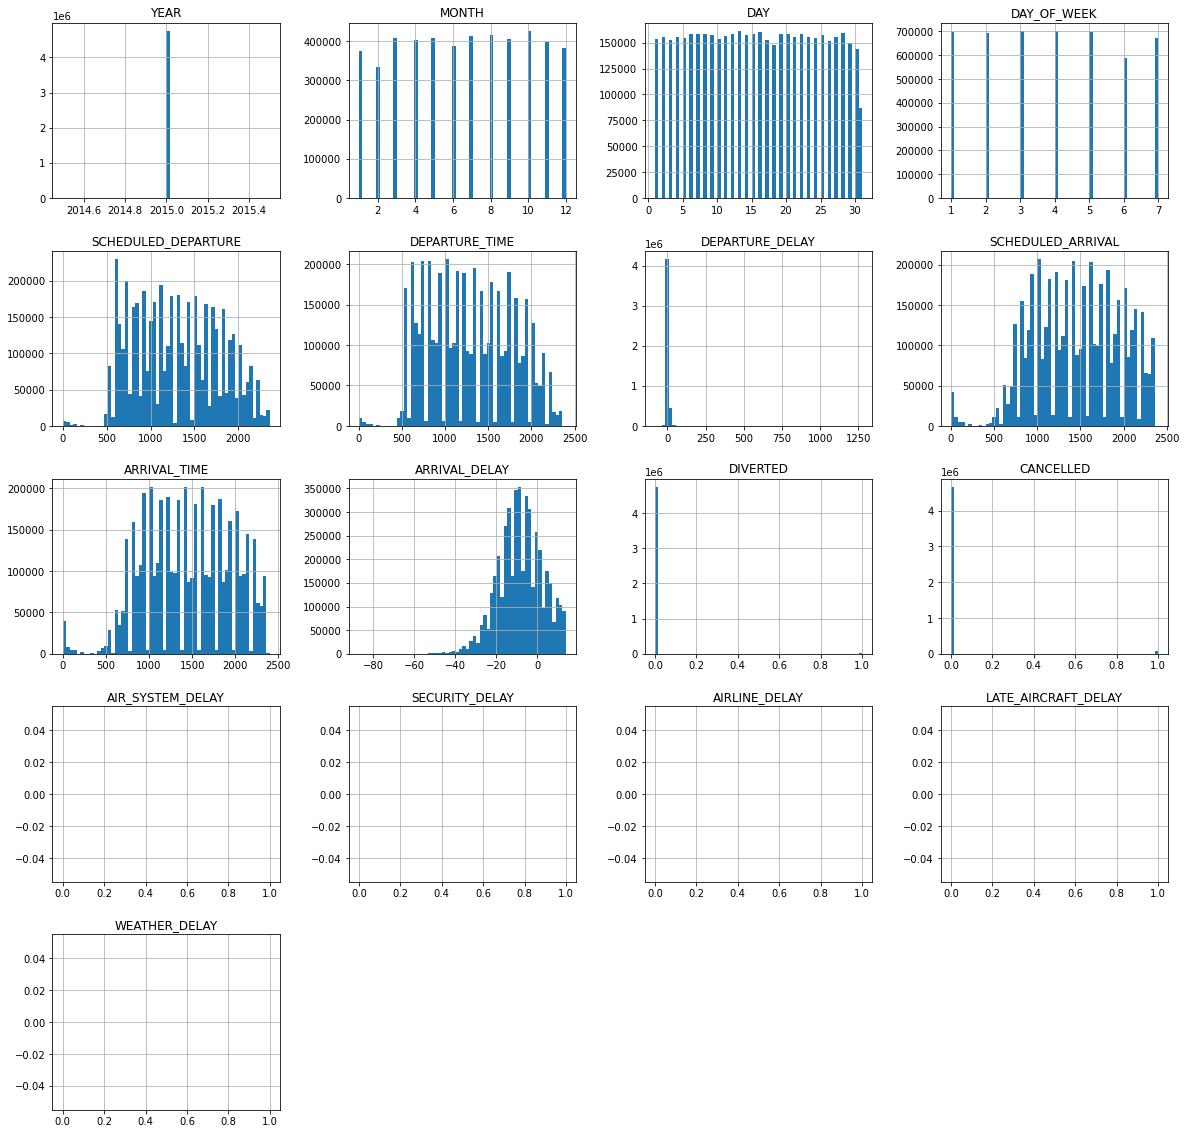

In [23]:
na_values.hist(bins=60, figsize=(20,20))

In [24]:
df[df['ARRIVAL_DELAY']>500]

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
3119,2015,1,1,4,UA,ORD,DFW,947,1759.0,492.0,1228,2054.0,506.0,0,0,NaN,14.0,0.0,25.0,467.0,0.0
6063,2015,1,1,4,DL,SJU,JFK,1256,2127.0,511.0,1600,32.0,512.0,0,0,NaN,1.0,0.0,511.0,0.0,0.0
6371,2015,1,1,4,AA,BOS,DFW,1315,905.0,1190.0,1645,1246.0,1201.0,0,0,NaN,11.0,0.0,1169.0,21.0,0.0
13858,2015,1,1,4,DL,LIH,LAX,2319,1339.0,860.0,644,2051.0,847.0,0,0,NaN,0.0,0.0,847.0,0.0,0.0
14547,2015,1,2,5,MQ,CLL,DFW,600,1900.0,780.0,700,2008.0,788.0,0,0,NaN,8.0,0.0,780.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5810553,2015,12,31,4,B6,TPA,DCA,1023,2011.0,588.0,1226,2206.0,580.0,0,0,NaN,0.0,0.0,580.0,0.0,0.0
5810811,2015,12,31,4,AA,ABQ,DFW,1041,1410.0,1649.0,1325,1641.0,1636.0,0,0,NaN,0.0,0.0,1636.0,0.0,0.0
5814721,2015,12,31,4,EV,GNV,ATL,1505,2349.0,524.0,1620,105.0,525.0,0,0,NaN,1.0,0.0,0.0,524.0,0.0
5818498,2015,12,31,4,UA,LAX,EWR,2050,551.0,541.0,500,1346.0,526.0,0,0,NaN,0.0,0.0,526.0,0.0,0.0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5714008 entries, 0 to 5819078
Data columns (total 21 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   ORIGIN_AIRPORT       object 
 6   DESTINATION_AIRPORT  object 
 7   SCHEDULED_DEPARTURE  int64  
 8   DEPARTURE_TIME       float64
 9   DEPARTURE_DELAY      float64
 10  SCHEDULED_ARRIVAL    int64  
 11  ARRIVAL_TIME         float64
 12  ARRIVAL_DELAY        float64
 13  DIVERTED             int64  
 14  CANCELLED            int64  
 15  CANCELLATION_REASON  object 
 16  AIR_SYSTEM_DELAY     float64
 17  SECURITY_DELAY       float64
 18  AIRLINE_DELAY        float64
 19  LATE_AIRCRAFT_DELAY  float64
 20  WEATHER_DELAY        float64
dtypes: float64(9), int64(8), object(4)
memory usage: 959.1+ MB


In [26]:
#pd.to_numeric(df['WEATHER_DELAY'])

In [27]:
df.dtypes

YEAR                     int64
MONTH                    int64
DAY                      int64
DAY_OF_WEEK              int64
AIRLINE                 object
ORIGIN_AIRPORT          object
DESTINATION_AIRPORT     object
SCHEDULED_DEPARTURE      int64
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
SCHEDULED_ARRIVAL        int64
ARRIVAL_TIME           float64
ARRIVAL_DELAY          float64
DIVERTED                 int64
CANCELLED                int64
CANCELLATION_REASON     object
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT_DELAY    float64
WEATHER_DELAY          float64
dtype: object

In [28]:
df = df[['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'ARRIVAL_DELAY','SCHEDULED_DEPARTURE', 'SCHEDULED_ARRIVAL',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY','LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']]

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5714008 entries, 0 to 5819078
Data columns (total 13 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   ARRIVAL_DELAY        float64
 6   SCHEDULED_DEPARTURE  int64  
 7   SCHEDULED_ARRIVAL    int64  
 8   AIR_SYSTEM_DELAY     float64
 9   SECURITY_DELAY       float64
 10  AIRLINE_DELAY        float64
 11  LATE_AIRCRAFT_DELAY  float64
 12  WEATHER_DELAY        float64
dtypes: float64(6), int64(6), object(1)
memory usage: 610.3+ MB


In [30]:
df['AIRLINE'].value_counts()

WN    1242403
DL     870275
AA     712935
OO     576814
EV     554752
UA     507762
MQ     278791
B6     262042
US     194223
AS     171439
NK     115193
F9      90090
HA      76041
VX      61248
Name: AIRLINE, dtype: int64

In [31]:
#df['ORIGIN_AIRPORT'].value_counts()

In [32]:
#len(df['ORIGIN_AIRPORT'].value_counts())

In [33]:
#len(df['DESTINATION_AIRPORT'].value_counts())

In [34]:
df['all_delay'] = df[['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY','ARRIVAL_DELAY','LATE_AIRCRAFT_DELAY', 
                      'WEATHER_DELAY']].sum(axis=1)

In [35]:
df

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ARRIVAL_DELAY,SCHEDULED_DEPARTURE,SCHEDULED_ARRIVAL,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,all_delay
0,2015,1,1,4,AS,-22.0,5,430,0.0,0.0,0.0,0.0,0.0,-22.0
1,2015,1,1,4,AA,-9.0,10,750,0.0,0.0,0.0,0.0,0.0,-9.0
2,2015,1,1,4,US,5.0,20,806,0.0,0.0,0.0,0.0,0.0,5.0
3,2015,1,1,4,AA,-9.0,20,805,0.0,0.0,0.0,0.0,0.0,-9.0
4,2015,1,1,4,AS,-21.0,25,320,0.0,0.0,0.0,0.0,0.0,-21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,-26.0,2359,819,0.0,0.0,0.0,0.0,0.0,-26.0
5819075,2015,12,31,4,B6,-16.0,2359,446,0.0,0.0,0.0,0.0,0.0,-16.0
5819076,2015,12,31,4,B6,-8.0,2359,440,0.0,0.0,0.0,0.0,0.0,-8.0
5819077,2015,12,31,4,B6,-10.0,2359,340,0.0,0.0,0.0,0.0,0.0,-10.0


In [36]:
df['delay_reasons'] = np.where(df['all_delay']>0,df[['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
                    'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']].idxmax(axis=1), 'no_delay')

In [37]:
df

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ARRIVAL_DELAY,SCHEDULED_DEPARTURE,SCHEDULED_ARRIVAL,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,all_delay,delay_reasons
0,2015,1,1,4,AS,-22.0,5,430,0.0,0.0,0.0,0.0,0.0,-22.0,no_delay
1,2015,1,1,4,AA,-9.0,10,750,0.0,0.0,0.0,0.0,0.0,-9.0,no_delay
2,2015,1,1,4,US,5.0,20,806,0.0,0.0,0.0,0.0,0.0,5.0,AIR_SYSTEM_DELAY
3,2015,1,1,4,AA,-9.0,20,805,0.0,0.0,0.0,0.0,0.0,-9.0,no_delay
4,2015,1,1,4,AS,-21.0,25,320,0.0,0.0,0.0,0.0,0.0,-21.0,no_delay
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,-26.0,2359,819,0.0,0.0,0.0,0.0,0.0,-26.0,no_delay
5819075,2015,12,31,4,B6,-16.0,2359,446,0.0,0.0,0.0,0.0,0.0,-16.0,no_delay
5819076,2015,12,31,4,B6,-8.0,2359,440,0.0,0.0,0.0,0.0,0.0,-8.0,no_delay
5819077,2015,12,31,4,B6,-10.0,2359,340,0.0,0.0,0.0,0.0,0.0,-10.0,no_delay


In [38]:
df['delay_reasons'].value_counts()

no_delay               3627112
AIR_SYSTEM_DELAY       1327241
LATE_AIRCRAFT_DELAY     410647
AIRLINE_DELAY           311386
WEATHER_DELAY            35711
SECURITY_DELAY            1911
Name: delay_reasons, dtype: int64

<AxesSubplot:>

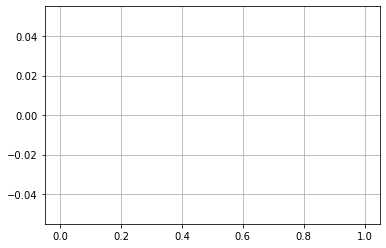

In [39]:
df[df['delay_reasons']=='no_delays']['ARRIVAL_DELAY'].hist(bins=60)

In [40]:
df.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'ARRIVAL_DELAY',
       'SCHEDULED_DEPARTURE', 'SCHEDULED_ARRIVAL', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY', 'all_delay', 'delay_reasons'],
      dtype='object')

In [41]:
df = df[['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE','SCHEDULED_DEPARTURE', 'SCHEDULED_ARRIVAL','delay_reasons']]

In [42]:
x = df[['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE','SCHEDULED_DEPARTURE', 'SCHEDULED_ARRIVAL']]
y = df['delay_reasons']

In [43]:
x

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,SCHEDULED_DEPARTURE,SCHEDULED_ARRIVAL
0,2015,1,1,4,AS,5,430
1,2015,1,1,4,AA,10,750
2,2015,1,1,4,US,20,806
3,2015,1,1,4,AA,20,805
4,2015,1,1,4,AS,25,320
...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,2359,819
5819075,2015,12,31,4,B6,2359,446
5819076,2015,12,31,4,B6,2359,440
5819077,2015,12,31,4,B6,2359,340


In [44]:
y

0                  no_delay
1                  no_delay
2          AIR_SYSTEM_DELAY
3                  no_delay
4                  no_delay
                 ...       
5819074            no_delay
5819075            no_delay
5819076            no_delay
5819077            no_delay
5819078    AIR_SYSTEM_DELAY
Name: delay_reasons, Length: 5714008, dtype: object

In [45]:
x = pd.get_dummies(x)

In [46]:
x

,YEAR,MONTH,DAY,DAY_OF_WEEK,SCHEDULED_DEPARTURE,SCHEDULED_ARRIVAL,AIRLINE_AA,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,AIRLINE_F9,AIRLINE_HA,AIRLINE_MQ,AIRLINE_NK,AIRLINE_OO,AIRLINE_UA,AIRLINE_US,AIRLINE_VX,AIRLINE_WN
0,2015,1,1,4,5,430,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,2015,1,1,4,10,750,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2015,1,1,4,20,806,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2015,1,1,4,20,805,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2015,1,1,4,25,320,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,2359,819,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5819075,2015,12,31,4,2359,446,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5819076,2015,12,31,4,2359,440,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5819077,2015,12,31,4,2359,340,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [47]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.20, random_state=101)

In [48]:
y_train.value_counts()

no_delay               2901522
AIR_SYSTEM_DELAY       1062287
LATE_AIRCRAFT_DELAY     328087
AIRLINE_DELAY           249192
WEATHER_DELAY            28578
SECURITY_DELAY            1540
Name: delay_reasons, dtype: int64

In [49]:
from imblearn.over_sampling import RandomOverSampler

In [50]:
ros = RandomOverSampler(random_state=0)

In [51]:
x_train,y_train = ros.fit_resample(x_train,y_train)

In [52]:
y_train.value_counts()

no_delay               2901522
LATE_AIRCRAFT_DELAY    2901522
AIR_SYSTEM_DELAY       2901522
AIRLINE_DELAY          2901522
WEATHER_DELAY          2901522
SECURITY_DELAY         2901522
Name: delay_reasons, dtype: int64

In [53]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc_pred = dtc.predict(x_test)

In [54]:
dtc_pred

array(['no_delay', 'no_delay', 'no_delay', ..., 'no_delay', 'no_delay',
       'no_delay'], dtype=object)

In [55]:
dtc.score(x_test,y_test)

0.5040689463266602

In [56]:
print(classification_report(y_test,dtc_pred))

                     precision    recall  f1-score   support

      AIRLINE_DELAY       0.08      0.10      0.09     62194
   AIR_SYSTEM_DELAY       0.28      0.29      0.28    264954
LATE_AIRCRAFT_DELAY       0.16      0.18      0.17     82560
     SECURITY_DELAY       0.02      0.03      0.03       371
      WEATHER_DELAY       0.08      0.09      0.08      7133
           no_delay       0.69      0.66      0.67    725590

           accuracy                           0.50   1142802
          macro avg       0.22      0.22      0.22   1142802
       weighted avg       0.52      0.50      0.51   1142802



In [57]:
print(confusion_matrix(y_test,dtc_pred))

[[  6057  16344   6561     28    545  32659]
 [ 18428  77072  23586    118   2093 143657]
 [  7155  21848  14641     34    975  37907]
 [    31    102     29     10      7    192]
 [   545   1971    925      7    607   3078]
 [ 40041 158937  44916    222   3810 477664]]
